Initial Energ: 50.0


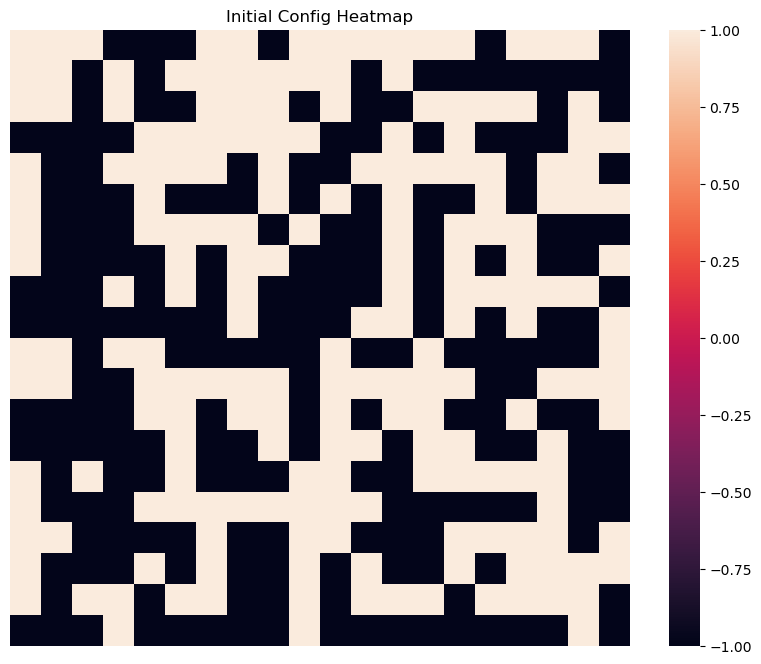

Final Energy: -38.0


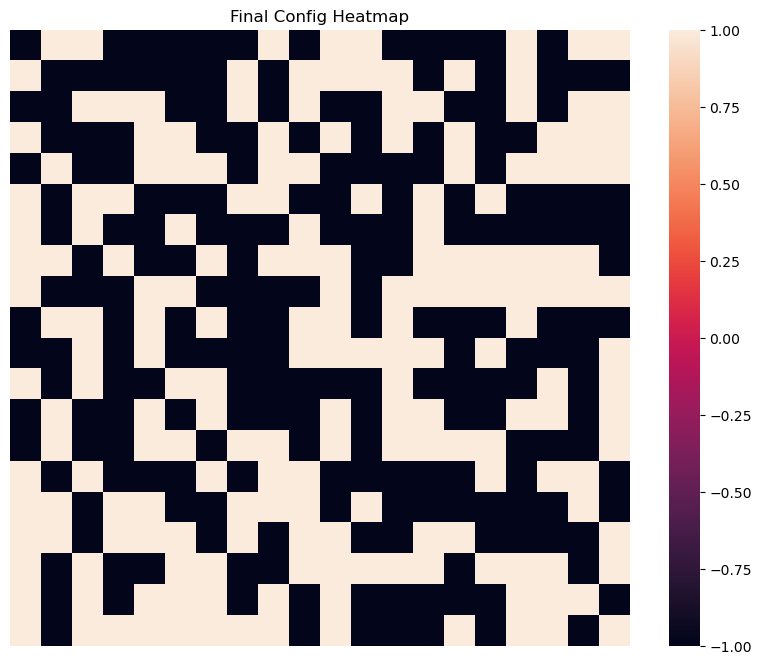

In [12]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

L = 20
J = 1.0
h = 1.0
b = 0.003
nsteps = 1000
M = 10

# initialization
def initial(l):
    conf = np.random.choice([-1, 1], size = (l, l), p = (0.5, 0.5))
    return conf

# energy calculation
def calc_energy(conf):
    energy = 0
    for i in range(L):
        for j in range(L):
            s = conf[i][j]
            right = conf[(i+1)%L][j]
            left = conf[(i-1)%L][j]
            up = conf[i][(j-1)%L]
            down = conf[i][(j+1)%L]
            energy += 0.5 * J * s * (up + down + right +left) + h*s # Correct the double-counting
    return energy  

conf = initial(L)
energy = calc_energy(conf)
print("Initial Energ:", energy)
# plot the initial configuration heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf)
plt.title('Initial Config Heatmap')
plt.axis('off')
plt.show()

# flip a random site
def flip_site(conf, l):
    i = random.randint(0, l - 1)
    j = random.randint(0, l - 1)
    new_conf = [row[:] for row in conf]
    new_conf[i][j] *= -1
    return new_conf

for n in range(nsteps):
    new_conf = flip_site(conf, L)
    new_energy = calc_energy(new_conf) 
    deltaE = new_energy - energy
    # whether accept the new conf or reject
    prob = min(1, math.exp(-b * deltaE))
    if random.random() < prob:
        conf = new_conf  # accept
        energy = new_energy

print("Final Energy:", energy)

# plot the final configuration heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf)
plt.title('Final Config Heatmap')
plt.axis('off')
plt.show()


Average energy for the run is: 2.296
<E^2> for the run is: 657.24
Average energy for the run is: 0.038
<E^2> for the run is: 738.66
Average energy for the run is: -7.572
<E^2> for the run is: 629.824
Average energy for the run is: -7.562
<E^2> for the run is: 1087.788
Average energy for the run is: -6.914
<E^2> for the run is: 749.036


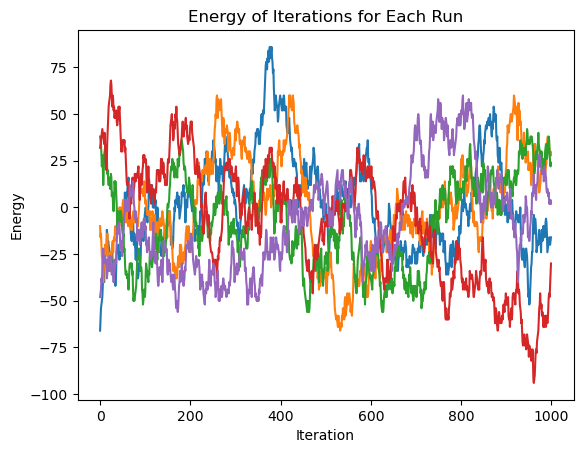

In [16]:
# high T

L = 20
J = 1.0
h = 1.0
b = 0.003 # room temp or higher temperature
nsteps = 1000
M = 5

def metropolis_hastings():
    conf = initial(L)
    energy = calc_energy(conf)
    energies = []

    for n in range(nsteps):
        new_conf = flip_site(conf, L)
        new_energy = calc_energy(new_conf)
        deltaE = new_energy - energy

        if random.random() < min(1, math.exp(-b * deltaE)):
            conf = new_conf
            energy = new_energy

        energies.append(energy)
        
    avg_energy = sum(energies) / nsteps # calculate average energy
    avg_energy_squared = sum(e**2 for e in energies) / nsteps # calculate <E^2>
    print("Average energy for the run is:", avg_energy)
    print("<E^2> for the run is:", avg_energy_squared)

    return energies

all_energies = [metropolis_hastings() for m in range(M)]
#final_energies = [run[-1] for run in all_energies]

# calculate final average energy <E>
#avg_energy = sum(final_energies) / M

# calculate <E^2>
#avg_energy_squared = sum(e**2 for e in final_energies) / M

# Calculate the standard error of <E>
#std_dev = np.sqrt((sum((e - avg_energy) ** 2 for e in final_energies) / (M - 1)))
#SE = std_dev / np.sqrt(M)

#print("Average Final Energy <E>:", avg_energy)
#print("Average of the Square of Final Energy <E^2>:", avg_energy_squared)
#print("Standard Error of the Mean:", SE)

# Plotting
for energies in all_energies:
    plt.plot(energies)

plt.title("Energy of Iterations for Each Run")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()


Average energy for the run is: -63.818
<E^2> for the run is: 4074.052
Average energy for the run is: -73.31
<E^2> for the run is: 5850.14
Average energy for the run is: -76.416
<E^2> for the run is: 5855.936
Average energy for the run is: -24.548
<E^2> for the run is: 628.56
Average energy for the run is: -64.532
<E^2> for the run is: 4170.792


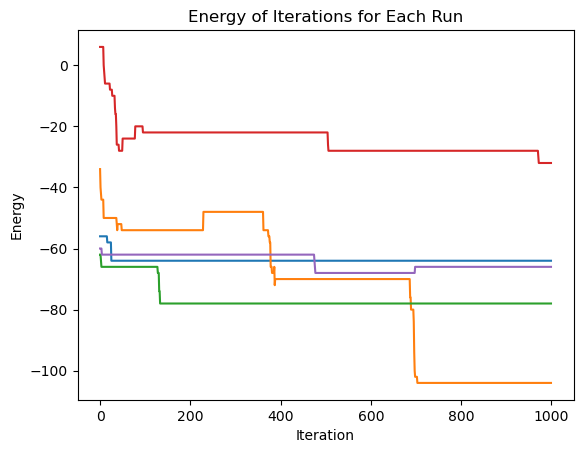

In [17]:
# low T, if we take larger value for beta

b = 1.0 # 1K or low temp, the config will trap in local minimum without follow the markov chain

all_energies = [metropolis_hastings() for m in range(M)]

# Plotting
for energies in all_energies:
    plt.plot(energies)

plt.title("Energy of Iterations for Each Run")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

Average energy for the run is: -19.212
<E^2> for the run is: 1682.064
Average energy for the run is: 7.56
<E^2> for the run is: 1777.344
Average energy for the run is: 4.428
<E^2> for the run is: 844.32
Average energy for the run is: 7.604
<E^2> for the run is: 1153.328
Average energy for the run is: 0.444
<E^2> for the run is: 1625.12


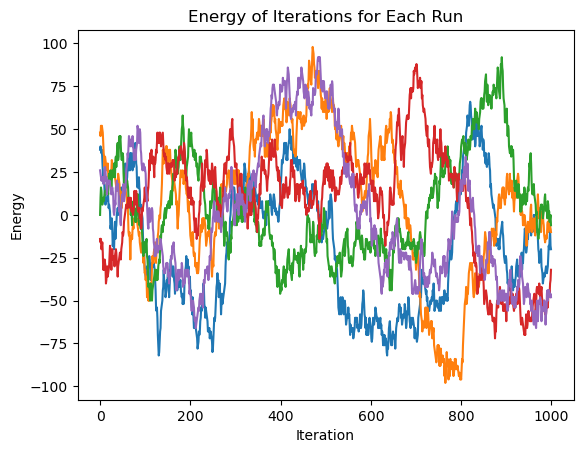

In [18]:
# extreme case, b=0, suggested by Dr. Hen

b = 0

all_energies = [metropolis_hastings() for m in range(M)]

# Plotting
for energies in all_energies:
    plt.plot(energies)

plt.title("Energy of Iterations for Each Run")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

In [20]:
# the suggested parameter from Dr. Hen for test
# {L, beta, J, h, <E>  ,<E^2>} = {1, 1, 0, 1, -0.761594155955765`, 1.`}

L = 1
J = 0
h = 1
b = 1

all_energies = [metropolis_hastings() for m in range(M)]

Average energy for the run is: -0.896
<E^2> for the run is: 1.0
Average energy for the run is: -0.846
<E^2> for the run is: 1.0
Average energy for the run is: -0.87
<E^2> for the run is: 1.0
Average energy for the run is: -0.868
<E^2> for the run is: 1.0
Average energy for the run is: -0.874
<E^2> for the run is: 1.0


In [21]:
# the suggested parameter from Dr. Hen for test
# {L, beta, J, h, <E>  ,<E^2>} = {3, 1, 0, 1, -6.85434740360176`, 50.761847403790796`}

L = 3
J = 0
h = 1
b = 1

all_energies = [metropolis_hastings() for m in range(M)]

Average energy for the run is: -4.912
<E^2> for the run is: 29.528
Average energy for the run is: -5.472
<E^2> for the run is: 37.16
Average energy for the run is: -5.82
<E^2> for the run is: 39.192
Average energy for the run is: -5.242
<E^2> for the run is: 33.304
Average energy for the run is: -6.906
<E^2> for the run is: 54.72


In [22]:
# the suggested parameter from Dr. Hen for test
# {L, beta, J, h, <E>  ,<E^2>} = {3, 1, 2, 1, -13.788351372907462`, 191.66845690002077`}

L = 3
J = 2
h = 1
b = 1

all_energies = [metropolis_hastings() for m in range(M)]

Average energy for the run is: -13.64
<E^2> for the run is: 187.616
Average energy for the run is: -13.704
<E^2> for the run is: 193.016
Average energy for the run is: -14.192
<E^2> for the run is: 204.648
Average energy for the run is: -13.904
<E^2> for the run is: 196.384
Average energy for the run is: -14.026
<E^2> for the run is: 197.968
